# The Kimura replicator model

The Kimura model is stochastic process that generalized the replicator model. The replicator model is a deterministic model for the fraction of species $n=1,...,N$ governed by 

$$\dot x_i = (\mu_i-\phi)x_i$$

where the parameters $\mu_i$ are fitnesses of species $i$ and $\phi=\sum _i \mu_i x_i$ is the population mean fitness and the population is normalized to unity, i.e. $\sum x_i=1$ because the $x_i$ are fractions of the entire population.

In the Kimura model the constant fitnesses $\mu_i$ are time dependent stochastic processes

$$\mu_i(t)dt=\mu_i dt+\sigma_idW_i$$

where $\mu_i$ and $\sigma_i$ are constants.

If the noise in all components vanishes, i.e. $\sigma_i=0$ the system is reduced to the replicator model.

For two populations $x=x_1$, $x_2=1-x_1=1-x$ the differential for the remaining variable $x$ reads, the ODE for the log ratio

$$y=\log\frac{x}{1-x}$$

reads

$$dy=\left(\mu+\frac{1}{2}\sigma^2\tanh(y/2)\right)dt +\sigma dW$$

where $\mu=\mu_1-\mu_2$ and $\sigma^2=\sigma_1^2+\sigma_2^2$.

In [1]:
## This is just for colors of the plots
from palettable.wesanderson import GrandBudapest3_6
import matplotlib as mpl
from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = cycler(color=GrandBudapest3_6.mpl_colors)
## --------

import matplotlib.pyplot as plt
import numpy as np
import stopro as p

## n populations with identical parameters

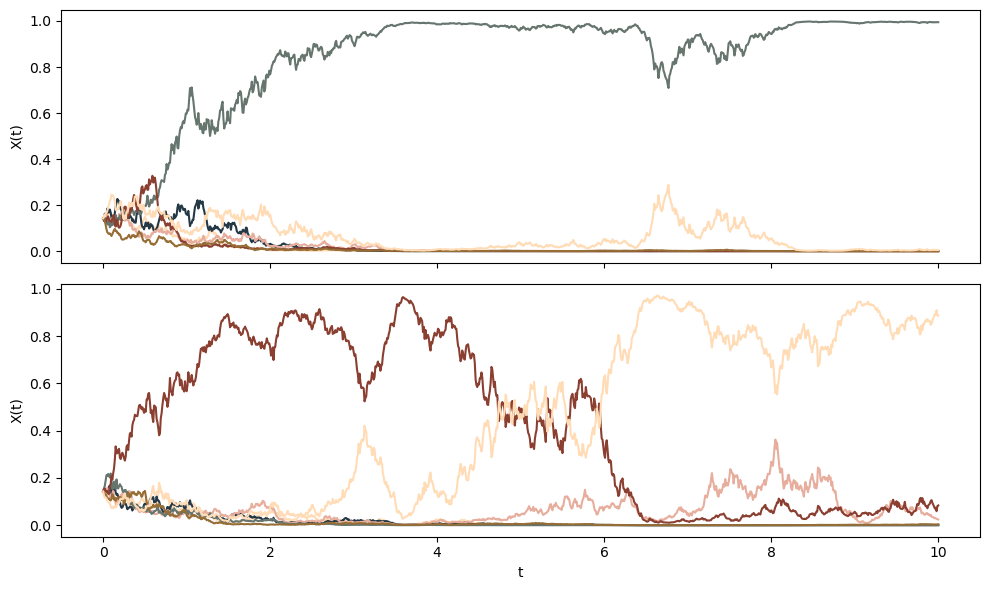

In [2]:
samples = 2
n = 7
mu = np.ones(n)
sigma = np.ones(n)

res = p.kimura_replicator(10,0.001,N=n,samples=samples,gap=10)

fig,ax = plt.subplots(samples,1,figsize=[10,6],sharex=True)
for i in range(samples):
    for j in range(n):
        ax[i].plot(res["t"],np.squeeze(res["X"][i][j]))
        if i== samples -1:
            ax[i].set_xlabel("t")
        ax[i].set_ylabel("X(t)")
plt.tight_layout()
plt.show()


## three populations with different noise terms and identical mean fitness

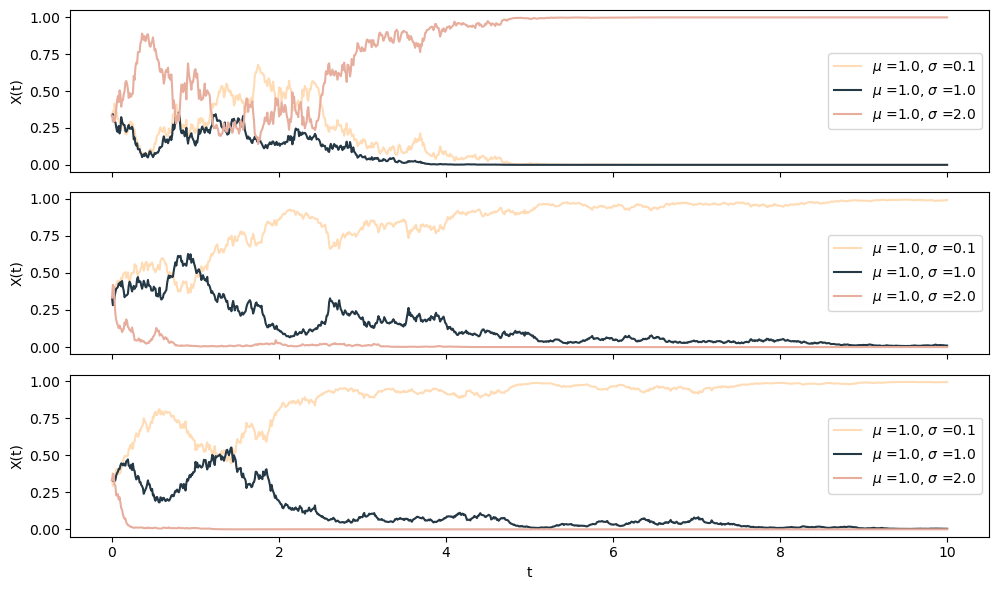

In [3]:
samples = 3
n = 3
mu = np.ones(n)
sigma = np.array([0.1,1.0,2.0])

res = p.kimura_replicator(10,0.001,N=n,sigma=sigma,samples=samples,gap=10)

leg=[r"$\mu$ ="+f'{x:.1f}'+r", $\sigma$ ="+f'{y:.1f}' for (x,y) in zip(res["mu"],res["sigma"])]

fig,ax = plt.subplots(samples,1,figsize=[10,6],sharex=True)
for i in range(samples):
    for j in range(n):
        ax[i].plot(res["t"],np.squeeze(res["X"][i][j]))
        if i == samples-1:
            ax[i].set_xlabel("t")
        ax[i].set_ylabel("X(t)")
        ax[i].legend(leg)
fig.tight_layout()
plt.show()


## two populations, many realizations

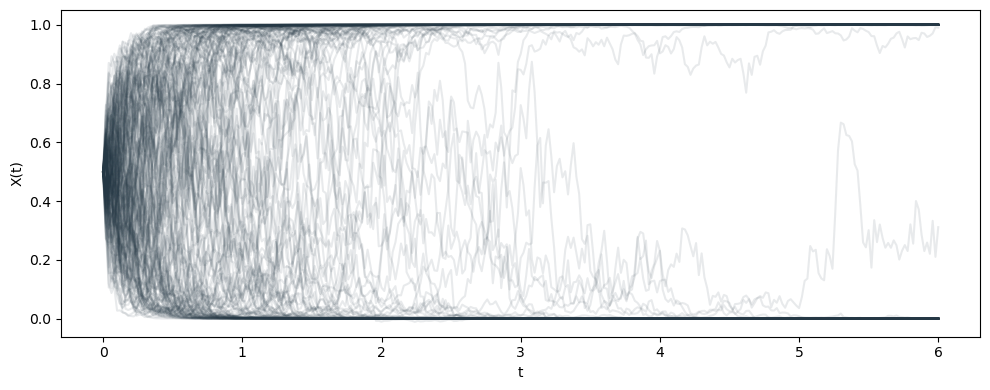

In [5]:
T = 6
samples = 200
n = 2

res = p.kimura_replicator(T,0.01,sigma=2,samples=samples,gap=2)

fig,ax = plt.subplots(1,1,figsize=[10,4])
for i in range(samples):
    ax.plot(res["t"],np.squeeze(res["X"][i][0]),color="C1",alpha=0.1)
    ax.set_xlabel("t")
    ax.set_ylabel("X(t)")

plt.tight_layout()
plt.show()


## here's an example with non-trivial covariance

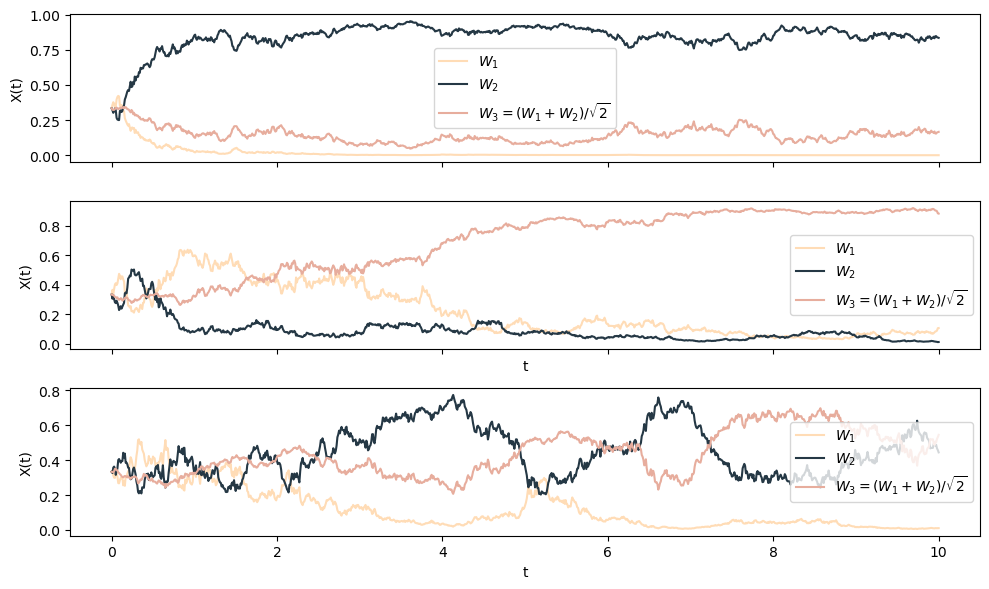

In [7]:
a = 1.0/np.sqrt(2)
cov = np.array([[1,0,a],[0,1,a],[a,a,1]])

samples = 3
N = 3


res = p.kimura_replicator(10,0.001,N=N,covariance=cov,samples=samples,gap=10)

leg=[r"$W_1$",r"$W_2$",r"$W_3=(W_1+W_2)/\sqrt{2}$"]

fig,ax = plt.subplots(samples,1,figsize=[10,6],sharex=True)
for i in range(samples):
    for j in range(N):
        ax[i].plot(res["t"],np.squeeze(res["X"][i][j]))
        if i: ax[i].set_xlabel("t")
        ax[i].set_ylabel("X(t)")
        ax[i].legend(leg)
fig.tight_layout()
plt.show()
